# Metropolis-Hastings algorithm (1953)

- It is a very general Markov chain Monte Carlo algorithm.

- It is based on an **acceptance-rejection scheme**: a new element is proposed and accepted
  with a well-chosen probability. If the proposal is rejected, the next element in
  the chain is the same. We can therefore write the transition probability as
  
  \begin{equation*}
    p(x \to y) = T(x \to y) A(x \to y)
  \end{equation*}
  
- $T(x \to y)$ is the probability to propose $y$ after being in $x$. It can be chosen
  freely! It should only ensure *ergodicity*, namely that any element can be reached
  
- $A(x \to y)$ is the probability that the proposed $y$ is accepted. In the Metropolis-Hastings
  algorithm it is
  
  \begin{equation*}
    A(x \to y) = \min \left( 1, \frac{T(y \to x) \, \pi(y)}{T(x \to y) \, \pi(x)} \right)
  \end{equation*}

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('style.mpl')

# Detailed balance

- Let's check that the Metropolis-Hastings transition probability satisfies the
  detailed balance condition
  
  \begin{equation*}
  \pi(x) \, p(x \to y) = \pi(y) \, p(y \to x)
  \end{equation*}
  
- We suppose $\pi(y) T(y \to x) < \pi(x) T(x \to y)$, then

  \begin{align*}
  \pi(x) \, p(x \to y) &=
  \pi(x) \, T(x \to y) A(x \to y) \\
  &= \pi(x) \, T(x \to y) \frac{T(y \to x) \pi(y)}{T(x \to y) \pi(x)} \\
  &= \pi(y) \, T(y \to x) \times 1 \\
  &= \pi(y) \, T(y \to x) A(y \to x) = \pi(y) \, p(y \to x)
  \end{align*}
    
- The same result is obtained by supposing $\pi(y) T(y \to x) > \pi(x) T(x \to y)$.

# Example: the non-uniform pebble game

- Consider a $3 \times 3$ tiling. A pebble is sitting on one of the
  tiles $k \in \{0, \ldots, 8\}$.
  
- This time, we want to move the pebble in way that the probability
  to find it on the tile $k$ is some given $\pi_k$.

- Let's define the transition probability

  \begin{equation*}
    T(x \to y) = \begin{cases}
    1/n(x) & \text{if $y$ is a neighbor of $x$} \\
    0 & \text{otherwise}
    \end{cases}
  \end{equation*}
  
  where $n(x)$ is the number of neighbors of $x$.

- The acceptance probability is

  \begin{equation*}
    A(x \to y) = \min \left( 1, \frac{\pi_y \, T(y \to x)}{\pi_x \, T(x \to y)} \right)
  \end{equation*}

- Let's try a target distribution

  \begin{equation*}
  \pi_k = \begin{cases}
  0.15 & \text{if $k$ is even} \\
  0.0625 & \text{if $k$ is odd}
  \end{cases}
  \end{equation*}
  
- You can check that it is normalized

In [2]:
# some target distribution
L = 3
π = np.zeros(L**2)
for i in range(L**2):
    π[i] = 0.15 if i%2==0 else 0.0625
print("Normalization: ", np.sum(π))

Normalization:  1.0


In [3]:
# build table of neighbors
neighbors = {}
shifts = [(-1,0), (1,0), (0,-1), (0,1)]
for i in range(L**2):
    neighbors[i] = []
    coord = np.array(np.unravel_index(i, [L,L]))
    for shift in shifts:
        try:
            neighbors[i].append(np.ravel_multi_index(coord+shift, [L,L]))
        except: pass
    
print("Table of neighbors")
for i in range(L**2):
    print(i, neighbors[i])

Table of neighbors
0 [3, 1]
1 [4, 0, 2]
2 [5, 1]
3 [0, 6, 4]
4 [1, 7, 3, 5]
5 [2, 8, 4]
6 [3, 7]
7 [4, 6, 8]
8 [5, 7]


In [4]:
# Metropolis-Hastings
n_samples = 2**15
samples = np.zeros(n_samples, dtype=int)

k = 0
for i in range(n_samples):
    
    # propose a neighbor of k with equal probability
    proposed_k = np.random.choice(neighbors[k])
    
    # compute acceptance probability
    t_forward = 1 / len(neighbors[k])
    t_backward = 1 / len(neighbors[proposed_k])
    accept_prob = π[proposed_k] * t_backward / (π[k] * t_forward)
    
    # accept or reject
    if np.random.rand() < accept_prob:
        k = proposed_k
        
    samples[i] = k

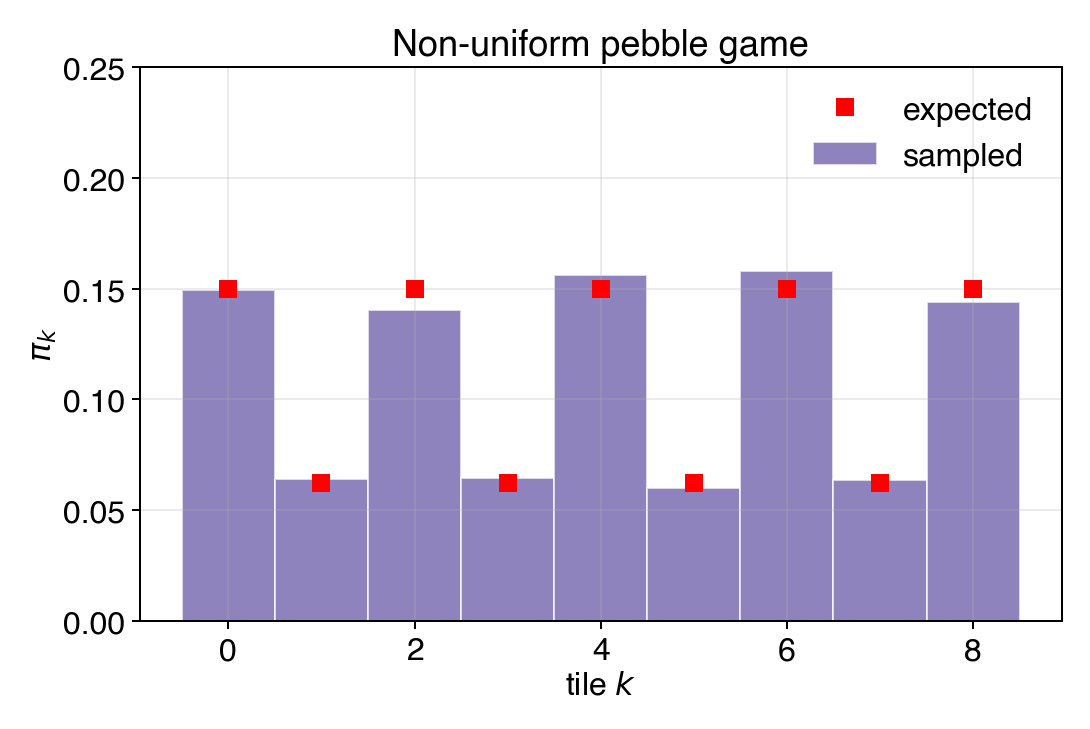

In [5]:
fig, ax = plt.subplots()
ax.hist(samples, bins=np.arange(-0.5, L**2+0.5), density=True, ec='w', alpha=0.7, label='sampled')
ax.plot(π, 'rs', label="expected")
ax.legend()
ax.grid(alpha=0.3)
ax.set_xlabel("tile $k$")
ax.set_ylabel("$\pi_k$");
ax.set_ylim(0, 0.25)
ax.set_title("Non-uniform pebble game");

# Summary

- The Metropolis-Hastings is a acceptance-rejection MCMC scheme.

- It is very versatile with applications to many algorithms.

- One must be very careful when computing the acceptance probability,
  this is often where difficult bugs appear.
  
- Designing good proposal probabilities has important consequences on the
  efficiency of a Metropolis-Hastings algorithm.

# Outline
    
- [Introduction to Monte Carlo](01-intro_monte_carlo.slides.html)

- [Newton–Cotes quadrature](02-newton_cotes.slides.html)
  
- [Importance sampling](03-importance_sampling.slides.html)

- [Direct sampling methods](04-direct_sampling.slides.html)

- [Markov chain sampling and balance condition](05-markov_chain.slides.html)

- [Metropolis-Hastings algorithm](06-metropolis_hastings.slides.html)

- [The two-dimensional Ising model](07-ising.slides.html)

- [Error bar analysis](08-error_analysis.slides.html)
  
- [References](09-references.slides.html)